In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
323,15619465,Female,48,30000,1
240,15701537,Male,42,149000,1
146,15750839,Female,27,96000,1
269,15583137,Male,40,61000,0
59,15789109,Female,32,117000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#Extract X and y
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [9]:
#scale down the X
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [10]:
#finding k value 
np.sqrt(X_train.shape[0])

17.88854381999832

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [13]:
y_pred=knn.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print(f'The accuracy score is {accuracy_score(y_test,y_pred)*100}%')

The accuracy score is 91.25%


In [15]:
#find the best value for k
accuracy_list=[]
for i in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    y_pred1=knn1.predict(X_test)
    accuracy_list.append((i,accuracy_score(y_test,y_pred1)))

In [16]:
sorted(accuracy_list,key=operator.itemgetter(1),reverse=True)[0]

(21, 0.9375)

In [17]:
knn2=KNeighborsClassifier(n_neighbors=21)

In [18]:
knn2.fit(X_train,y_train)
y_pred2=knn2.predict(X_test)
print(f'The accuracy score is {accuracy_score(y_test,y_pred2)*100}%')

The accuracy score is 93.75%


Function to predict output

In [19]:
def pred_out():
    age=int(input('Enter the age'))
    salary=int(input('Enter the salary'))
    X_new=np.array([[age],[salary]]).reshape(1,2)
    #scale down the values
    X_new=st.transform(X_new)
    #now predict
    out=knn2.predict(X_new)[0]
    if out==1:
        print('Will  purchase')
    else:
        print('Will not purchase')

In [20]:
pred_out()

Will  purchase


Decision Boundary for KNN

In [21]:
#create a meshgrid that desnely cover the input region
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)
#meshgrid
aa,bb=np.meshgrid(a,b)

In [22]:
input_array=np.array([aa.ravel(),bb.ravel()]).T

In [23]:
labels=knn2.predict(input_array)

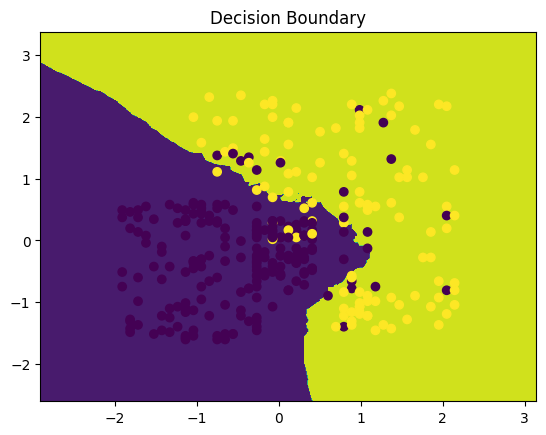

In [24]:
#plot the decision boundary
plt.contourf(aa,bb,labels.reshape(aa.shape))
plt.title('Decision Boundary')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()